# **Required Libraries**

In [34]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# import dataset from google cloud

In [35]:
dataset_url = "https://storage.googleapis.com/image_porn/nowtrain.tar.gz"
data_dir = tf.keras.utils.get_file('trainnewtwo', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [36]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print('Number of image :', image_count)

Number of image : 35605


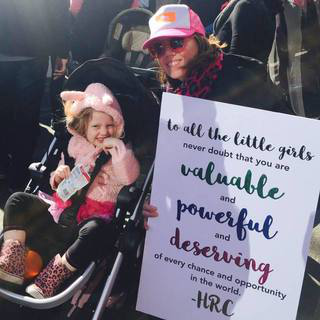

In [51]:
xx = list(data_dir.glob('pass/*'))
PIL.Image.open(str(xx[666]))

# Spilt data

In [52]:
img_height,img_width=180,180
batch_size=32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 35605 files belonging to 2 classes.
Using 28484 files for training.


In [53]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 35605 files belonging to 2 classes.
Using 7121 files for validation.


In [54]:
class_names = train_ds.class_names
print(class_names)

['block', 'pass']


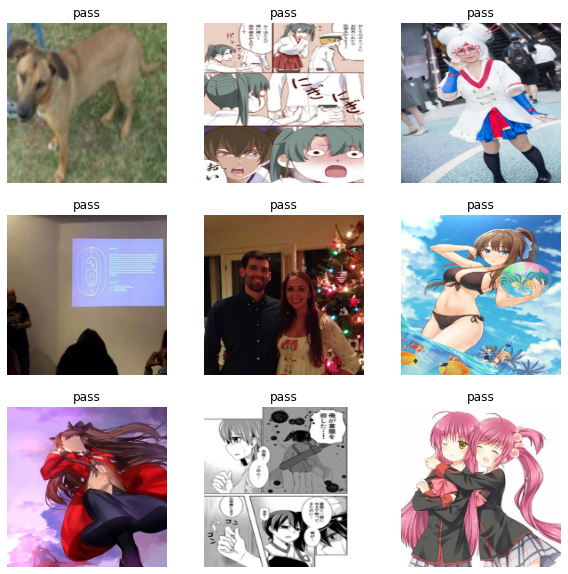

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Create Model

In [57]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
num_classes = 2

def create_model():
  model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes,activation='softmax')
  ])

  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  return model
  
# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 64)       

# Train Model

In [58]:
epochs=7
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/7
891/891 [==============================] - 611s 684ms/step - loss: 0.5972 - accuracy: 0.6801 - val_loss: 0.4689 - val_accuracy: 0.7766
Epoch 2/7
891/891 [==============================] - 611s 685ms/step - loss: 0.4768 - accuracy: 0.7739 - val_loss: 0.4966 - val_accuracy: 0.7604
Epoch 3/7
891/891 [==============================] - 604s 677ms/step - loss: 0.4250 - accuracy: 0.8049 - val_loss: 0.4419 - val_accuracy: 0.8042
Epoch 4/7
891/891 [==============================] - 561s 629ms/step - loss: 0.3436 - accuracy: 0.8473 - val_loss: 0.5849 - val_accuracy: 0.7769
Epoch 5/7
891/891 [==============================] - 597s 669ms/step - loss: 0.2485 - accuracy: 0.8957 - val_loss: 0.6708 - val_accuracy: 0.7990
Epoch 6/7
891/891 [==============================] - 580s 650ms/step - loss: 0.1524 - accuracy: 0.9397 - val_loss: 0.8818 - val_accuracy: 0.7784
Epoch 7/7
891/891 [==============================] - 566s 635ms/step - loss: 0.0985 - accuracy: 0.9631 - val_loss: 0.9724 - val_ac

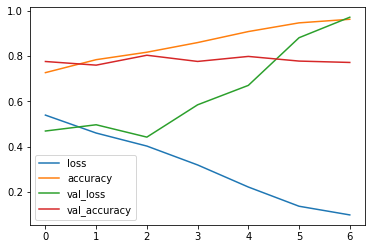

In [59]:
import pandas as pd
pd.DataFrame(history.history).plot();

# Save Model

In [60]:
tf.keras.models.save_model(model, 'img_model2.hdf5')

# Load Model

In [62]:
from keras.models import load_model
model = load_model('img_model2.hdf5')

# HTTP Request get

In [63]:
import requests
import urllib.request
from bs4 import BeautifulSoup
import re
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
from PIL import Image # pillow package (Python Image Library)
import io

# Block

In [64]:
url ='https://www.pornpics.com/european/'
r=requests.get(url)
s = BeautifulSoup(r.text, 'lxml')
type(s)
print(s.prettify())

<!DOCTYPE html>
<html class="modern-browser" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="RTA-5042-1996-1400-1577-RTA" name="RATING"/>
  <title>
   Euro Porn Pics, Nude European Girls XXX - PornPics.com
  </title>
  <meta content="width=device-width, initial-scale=0.8, maximum-scale=0.8, user-scalable=0 viewport-fit=cover" name="viewport"/>
  <meta content="Unimaginably steamy FREE European porn pics of super hot European women engaging in some of the most intense and intensely arousing sex you've ever witnessed." name="description"/>
  <meta content="always" name="referrer"/>
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link crossorigin="" href="https://cdni.pornpics.com" rel="preconnect"/>
  <link href="https://css.pornpics.com" rel="dns-prefetch"/>
  <link href="https://static.pornpics.com" rel="dns-prefetch"/>
  <link href="https://cdni.pornpics.com" rel="dns-prefetch"/>
  <link href="https://rel.pornpics.com" rel="dns-prefetch"/>
  <link href="htt

In [66]:
members = s.find_all('li', {'class':'thumbwook'})
members

[<li class="thumbwook"><a class="rel-link" data-gid="98619029" data-index="1" data-mid="98619029_41234798" data-tid="41234798" href="/galleries/hot-teen-niemira-spreads-her-long-legs-for-a-good-look-at-her-tight-slit-98619029/"><img alt="Hot teen Niemira spreads her long legs for a good look at her tight slit" data-src="https://cdni.pornpics.com/460/1/291/98619029/98619029_010_d293.jpg" height="444" src="https://static.pornpics.com/style4/img/1px.png" width="300"/></a></li>,
 <li class="thumbwook"><a class="rel-link" data-gid="68136355" data-index="1" data-mid="68136355_41459310" data-tid="41459310" href="/galleries/sweet-teen-ginger-frost-admires-her-art-work-before-modelling-in-the-nude-68136355/"><img alt="Sweet teen Ginger Frost admires her art work before modelling in the nude" data-src="https://cdni.pornpics.com/460/1/274/68136355/68136355_013_2ee2.jpg" height="430" src="https://static.pornpics.com/style4/img/1px.png" width="300"/></a></li>,
 <li class="thumbwook"><a class="rel-l

In [67]:
len(members)

20

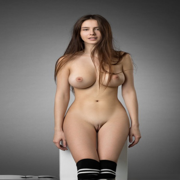

'ฺBlock'

'0.97'

'Pass'

'0.03'

In [87]:
x1=members[19].select_one('img')
resz = requests.get(x1['data-src'], stream = True)
imgz = PIL.Image.open(resz.raw).resize((180,180))
display(imgz)
img_array = np.array(imgz)
new_img_array = img_array[np.newaxis,:,:,:]
new_img_array.shape#มิติ
pred_z = model.predict(new_img_array)
display('ฺBlock','%.2f' %pred_z[0][0])
display('Pass','%.2f' %pred_z[0][1])

# Pass

In [88]:
url2='https://www.pinterest.com/mat989765456/%E0%B8%A3%E0%B8%9B%E0%B8%97%E0%B8%A7%E0%B9%84%E0%B8%9B/'
r2=requests.get(url2)
s2 = BeautifulSoup(r2.text, 'lxml')
type(s2)
print(s2.prettify())

<!DOCTYPE html>
<html class="en" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <script crossorigin="anonymous" nonce="8de11ba7a43cde194730ad48bd133104" src="https://s.pinimg.com/webapp/runtime-24cacfc82fe79e0c.js">
  </script>
  <script crossorigin="anonymous" defer="" nonce="8de11ba7a43cde194730ad48bd133104" src="https://s.pinimg.com/webapp/polyfills-241f2fab843a6e1a.js">
  </script>
  <script crossorigin="anonymous" defer="" nonce="8de11ba7a43cde194730ad48bd133104" src="https://s.pinimg.com/webapp/vendor-react-6f08d6ba60496f4e.js">
  </script>
  <script crossorigin="anonymous" defer="" nonce="8de11ba7a43cde194730ad48bd133104" src="https://s.pinimg.com/webapp/18265-03afa77a4410b2e3.js">
  </script>
  <script crossorigin="anonymous" defer="" nonce="8de11ba7a43cde194730ad48bd133104" src="https://s.pinimg.com/webapp/65467-cfb11a8b27face2f.js">
  </script>
  <script crossorigin="anonymous" defer="" nonce="8de11ba7a43cde194730ad48

In [89]:
members2 = s2.find_all('div', {'class': 'XiG zI7 iyn Hsu'})
members2

[<div class="XiG zI7 iyn Hsu" style="height:48px;width:48px;z-index:1"><div class=""><div class="INd XiG zI7 iyn Hsu" style="box-shadow:0 0 0 1px #fff;width:48px;height:48px"><div class="Pj7 sLG XiG INd m1e"><div class="XiG zI7 iyn Hsu" style="background-color:#efefef;padding-bottom:100%"><img alt="mat989765456" class="hCL kVc L4E MIw" importance="auto" loading="auto" src="https://i.pinimg.com/75x75_RS/ac/b5/12/acb512a9ff70a8388a03176dddb2d60f.jpg"/></div><div class="KPc MIw ojN Rym p6V QLY"></div></div></div></div></div>,
 <div class="XiG zI7 iyn Hsu" style="background-color:#efefef;padding-bottom:100%"><img alt="mat989765456" class="hCL kVc L4E MIw" importance="auto" loading="auto" src="https://i.pinimg.com/75x75_RS/ac/b5/12/acb512a9ff70a8388a03176dddb2d60f.jpg"/></div>,
 <div class="XiG zI7 iyn Hsu" style="margin-top:0%;margin-bottom:0%"><div class="Pj7 sLG XiG ho- m1e"><div class="XiG zI7 iyn Hsu" style="background-color:#1b0b03;padding-bottom:51.69491525423729%"><img alt="De un mo

In [90]:
len(members2)

53

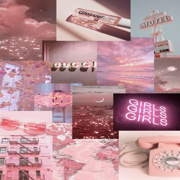

'ฺBlock'

'0.84'

'Pass'

'0.16'

In [131]:
x2=members2[52].select_one('img')
resz2 = requests.get(x2['src'], stream = True)
imgz2 = PIL.Image.open(resz2.raw).resize((180,180))
display(imgz2)
img_array2 = np.array(imgz2)
new_img_array2 = img_array2[np.newaxis,:,:,:]
new_img_array2.shape
pred_z2 = model.predict(new_img_array2)
display('ฺBlock','%.2f' %pred_z2[0][0])
display('Pass','%.2f' %pred_z2[0][1])